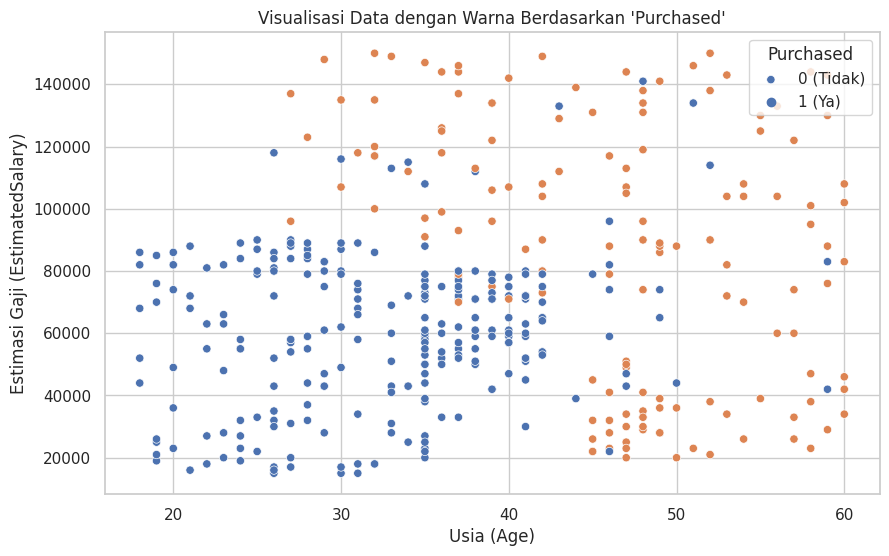

Confusion Matrix:
[[57  1]
 [ 5 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



In [2]:
# Nama = Fakhrity Hikmawan
# NIM = 1103204074
# Kelas = TK-44-G4

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
data = pd.read_csv('/content/sample_data/SocialNetworkAds.csv')

# Memisahkan variabel independen (fitur) dan dependen (target)
X = data.iloc[:, [2, 3]].values
y = data['Purchased'].values

# Melakukan encoding pada kolom "Gender" karena ini adalah variabel kategorikal
label_encoder = LabelEncoder()
X[:, 0] = label_encoder.fit_transform(X[:, 0])

# Memisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Melakukan penskalaan fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat model regresi logistik
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)

# Melakukan prediksi menggunakan model
y_pred = logistic_regression.predict(X_test)

# Menganalisis hasil prediksi
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="EstimatedSalary", hue="Purchased", data=data)
plt.title("Visualisasi Data dengan Warna Berdasarkan 'Purchased'")
plt.xlabel("Usia (Age)")
plt.ylabel("Estimasi Gaji (EstimatedSalary)")
plt.legend(title="Purchased", loc="upper right", labels=["0 (Tidak)", "1 (Ya)"])
plt.show()

print("Confusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(classification_rep)
